# Sentiment Analysis


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df=pd.read_csv('DataAferEDA.csv')
df

,Unnamed: 0,Name,Time,Store,Comment
0,0,macantonioc,25-06-2007,DigInfo,interesting
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,223256,Mark H.,09-09-2020,Walmart,walmart
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [39]:
#Drop Unnamed: 0 column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Name,Time,Store,Comment
0,macantonioc,25-06-2007,DigInfo,interesting
1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,Mark H.,09-09-2020,Walmart,walmart
209575,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [40]:
#drop the column which year is 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
df=df.drop(df[df['Time'].str[-4:]=='2007'].index)
df=df.drop(df[df['Time'].str[-4:]=='2008'].index)
df=df.drop(df[df['Time'].str[-4:]=='2009'].index)
df=df.drop(df[df['Time'].str[-4:]=='2010'].index)
df=df.drop(df[df['Time'].str[-4:]=='2011'].index)
df=df.drop(df[df['Time'].str[-4:]=='2012'].index)
df=df.drop(df[df['Time'].str[-4:]=='2013'].index)
df=df.drop(df[df['Time'].str[-4:]=='2014'].index)
df=df.drop(df[df['Time'].str[-4:]=='2015'].index)
df=df.drop(df[df['Time'].str[-4:]=='2016'].index)
df=df.drop(df[df['Time'].str[-4:]=='2017'].index)
df

,Name,Time,Store,Comment
569,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...
570,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...
571,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item
572,Jenae K.,01-06-2018,Amazon Go,crazy no cashier no line
573,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...
...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,Mark H.,09-09-2020,Walmart,walmart
209575,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [41]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
df['scores'] = df['Comment'].apply(lambda re: sent_analyzer.polarity_scores(str(re)))
df

,Name,Time,Store,Comment,scores
569,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...,"{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp..."
570,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp..."
571,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
572,Jenae K.,01-06-2018,Amazon Go,crazy no cashier no line,"{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'comp..."
573,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp..."
...,...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
209574,Mark H.,09-09-2020,Walmart,walmart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
209575,Lorna B.,09-09-2021,Walmart,improve site much improve,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [43]:
#show scores of each comment
df['scores']

569       {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp...
570       {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...
571       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
572       {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'comp...
573       {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...
                                ...                        
209573    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
209574    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
209575    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
209576    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
209577    {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...
Name: scores, Length: 159115, dtype: object

In [44]:
#calculate the sentiment score for each comment
df['sentiment_score'] = df['Comment'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

def analysis(score):
  
  polarity = "neutral"

  if(score['compound']>= 0.05):
    polarity = "positive"

  elif(score['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  score = sent_analyzer.polarity_scores(text)
  return analysis(score)

# Run the predictions
df["polarity"] = df["Comment"].apply(predict_sentiment)

# Show 5 random rows of the data
df

,Name,Time,Store,Comment,scores,sentiment_score,polarity
569,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...,"{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp...",0.9136,positive
570,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,positive
571,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
572,Jenae K.,01-06-2018,Amazon Go,crazy no cashier no line,"{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'comp...",-0.7003,negative
573,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...",0.7579,positive
...,...,...,...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
209574,Mark H.,09-09-2020,Walmart,walmart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
209575,Lorna B.,09-09-2021,Walmart,improve site much improve,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.7003,positive
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [45]:
#show 20 random rows of the data
df.sample(20)


,Name,Time,Store,Comment,scores,sentiment_score,polarity
61898,Cnvccbcczz,26-09-2020,Amazon Fresh,nah,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.1027,negative
1969,ChucklesNuts,27-01-2018,Amazon Go,amazon want dozen store close live work,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.2500,positive
51199,Heidi,28-12-2019,Sobeys,canada,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
156148,"Sharon of Fayetteville, AR",02-08-2019,Walmart,huge time saver,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",0.3182,positive
129756,Gil,29-05-2020,Walmart,try replace non fitting item tell not replace ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
68033,Ricky Haun,02-02-2021,Walmart,associate warm friendly,"{'neg': 0.0, 'neu': 0.164, 'pos': 0.836, 'comp...",0.6249,positive
8369,Cathy,28-01-2018,Amazon Go,feel sorry,"{'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'comp...",-0.0772,negative
44818,Joe Sammons,05-11-2019,Walmart,return cell phone humboldt tn store,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
55502,Consumer,03-11-2020,Walmart,walmart pathetic dinosaur business model,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.5719,negative
48059,Mr. Shows,31-08-2019,Amazon Go,not get,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [46]:
#drop

<AxesSubplot:title={'center':'Sentiment Analysis'}>

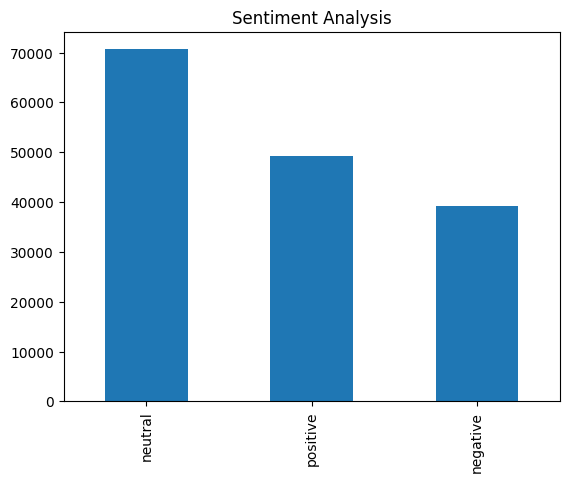

In [47]:
#count the number of positive, negative and neutral comments and plot them
df['polarity'].value_counts().plot(kind='bar', title='Sentiment Analysis')


<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Store'>

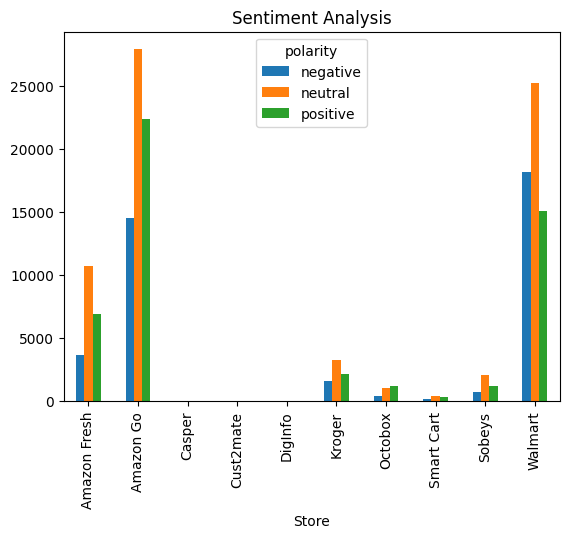

In [48]:
#count the number of positive, negative and neutral comments of each store and plot them
df.groupby('Store')['polarity'].value_counts().unstack().plot(kind='bar', title='Sentiment Analysis')
 


In [49]:
df1=pd.read_csv('dictionary.csv')
df1

,term,aspect
0,store,general
1,grocery,general
2,shop,general
3,shopping,general
4,customer,general
...,...,...
1557,system crash,technology
1558,system problem,technology
1559,system program,technology
1560,technology innovation,technology


In [51]:
#rename data to data intergration
df1.rename(columns={'data':'Data'}, inplace=True)
df1


,term,aspect
0,store,general
1,grocery,general
2,shop,general
3,shopping,general
4,customer,general
...,...,...
1557,system crash,technology
1558,system problem,technology
1559,system program,technology
1560,technology innovation,technology


In [54]:
#rename value of aspect
df1['aspect'].replace({'payment':'Payment and check-out','price':'Price & value','marketing':'Marketing, communications & special offers','technology':'Technology','experience':'Shopping experience','unemployment':'Unemployment','general':'General','privacy':'Privacy & Security issues','product':'Product availability & store design','data':'Data integration & analytics'}, inplace=True)

<AxesSubplot:>

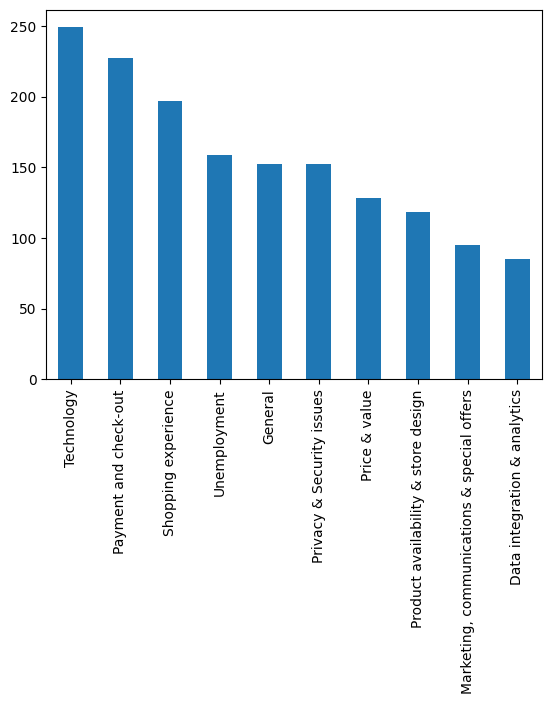

In [56]:
#count the number of each aspect
df1['aspect'].value_counts().plot(kind='bar')


In [29]:
#export the data to csv file
df.to_csv('DataAfterSentimentAnalysis.csv')